# Analysis of world suicide rate from 1985 to 2016
By Osman Cen

This exercise an analysis of WorlBank suicide data from 101 countries between 1985-2016.
The data has been downloaded from https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016

## An overall summary of the analysis
- Total suicide numbers are above 110K in 1985 with a steady increase reaching to 250K in early 2000s with a slow decrease afterward but staying above 200K by 2015. 
- The average suicide number per year per country is between 200 and 280 giving about 16-25 people per 100K per country per year.  
- The suicide rate is 3-6 times larger in male population than in female population.
- The suicide rate increases with age and as generations get older. 
- The suicide rate is highest among the Eastern European and Russian Federation countries. 
- At overall level, there is not a good correlation between suicide rate and GDP. However, the high suicide rate is inversely correlated with low GDP mostly in countries with high suicide rate and low GDP. However, some countries are exception from this generalized comment, such as Guyana, Republic of Korea, and Suriname show an increased suicide rate with increased GDP. This observation indicates that there are other indicators that effect the rate of suicide in different countries.   


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data file as df
df = pd.read_csv("./data/suicide_world_data.csv")

## Exploring and cleaning data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

#### Implement the following changes to the columns to clean up data and make it suitable for python coding:  
1. Drop "country-year" as it is redundant from concatination of two columns: "country" (index 0) and "year" (index 1).  
2. Change the names of the following columns for compatibility with python coding:  
    a. "suicides/100k pop" : "suicides_per_100k",  
    b. "HDI for year" : "HDI_for_year",  
    c. " gdp_for_year () " : "GDP_for_year_USD",  
    d. "gdp_per_capita ()" : "GDP_per_capita_USD"  
3. Change data type of the "gdp_for_year ()" (now "GDP_for_year_USD") from object to integer (int64).

In [5]:
df.drop("country-year", axis=1, inplace=True)

In [6]:
df.rename(columns={"suicides/100k pop" : "suicides_per_100k",
                   "HDI for year" : "HDI_for_year",
                   " gdp_for_year ($) " : "GDP_for_year_USD",
                   "gdp_per_capita ($)" : "GDP_per_capita_USD"}, inplace=True)
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per_100k', 'HDI_for_year', 'GDP_for_year_USD',
       'GDP_per_capita_USD', 'generation'],
      dtype='object')


In [7]:
df["GDP_for_year_USD"] = df["GDP_for_year_USD"].str.replace(',','').astype(np.int64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides_per_100k   27820 non-null  float64
 7   HDI_for_year        8364 non-null   float64
 8   GDP_for_year_USD    27820 non-null  int64  
 9   GDP_per_capita_USD  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 2.3+ MB


### Analyze the content of columns
Now, let's look into the content of the columns: 

In [9]:
df.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k,HDI_for_year,GDP_for_year_USD,GDP_per_capita_USD,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers


#### Unique values in each column 
Let's analyze how many unique values are there in each column

In [10]:
n = df.nunique(axis=0)
print("number of unique values in each column :\n", n)

number of unique values in each column :
 country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides_per_100k      5298
HDI_for_year            305
GDP_for_year_USD       2321
GDP_per_capita_USD     2233
generation                6
dtype: int64


What are the 6 unique names in the "age" column:

In [11]:
n_age = df.age.unique()
print("unique values in age column :", n_age)

unique values in age column : ['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


Change "5-14 years" to "05-14 years" for proper sorting

In [12]:
df["age"] = df["age"].str.replace("5-14 years", "05-14 years")

What are the 6 unique names in the "generation" column:
##### General info about generations: 
Generation Alpha: born 2012 - present.  
Generation Z: born 1997 - 2012.  
Generation Millenials: born 1981 - 1996.  
Generation X: born 1965 - 1980.  
Generation Boomers: born 1946 - 1964.  
Generation Silent: born 1928 - 1945.  
Generation G.I./Greatest: born 1901 - 1927.  
Generation Lost: born 1883 - 1900.  
Reference: https://upload.wikimedia.org/wikipedia/commons/3/3e/Generation_timeline.svg 

In [13]:
n_age = df.generation.unique()
print("unique values in generation column :\n", n_age)

unique values in generation column :
 ['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


Rearrange the unique names in the "generation" column as indicated below for proper sorting:

In [14]:
df["generation"] = df["generation"].str.replace("Generation Z", "1997_Gen_Z")
df["generation"] = df["generation"].str.replace("Millenials", "1981_Gen_Millenials")
df["generation"] = df["generation"].str.replace("Generation X", "1965_Gen X")
df["generation"] = df["generation"].str.replace("Boomers", "1946_Gen_Boomers")
df["generation"] = df["generation"].str.replace("Silent", "1928_Gen_Silent")
df["generation"] = df["generation"].str.replace("G.I. Generation", "1901_Gen_GI")

In [15]:
df

,country,year,sex,age,suicides_no,population,suicides_per_100k,HDI_for_year,GDP_for_year_USD,GDP_per_capita_USD,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,1965_Gen X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,1928_Gen_Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,1965_Gen X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,1901_Gen_GI
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,1946_Gen_Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,63067077179,2309,1965_Gen X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,63067077179,2309,1928_Gen_Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,0.675,63067077179,2309,1997_Gen_Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,0.675,63067077179,2309,1997_Gen_Z


General statistics for the columns

In [16]:
df.describe()

,year,suicides_no,population,suicides_per_100k,HDI_for_year,GDP_for_year_USD,GDP_per_capita_USD
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


Let's see the countries on in the "country" column

## Overall suicide numbers and rates over the years
Let's first look at the number of suicide cases over the years between from 1985 to 2016, the years covered within the data set.

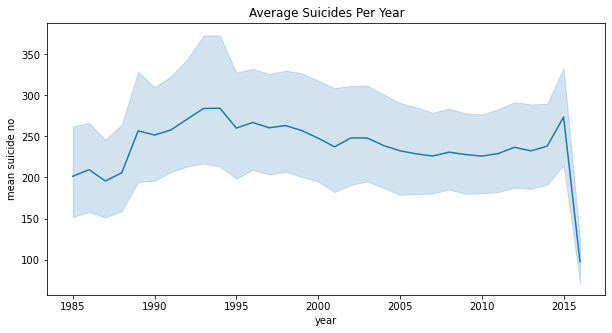

In [17]:
plt.figure(figsize = (10, 5))
sns.lineplot(x=df.year, y=df.suicides_no)
plt.xlabel("year")
plt.ylabel("mean suicide no")
plt.title("Average Suicides Per Year")
plt.show()

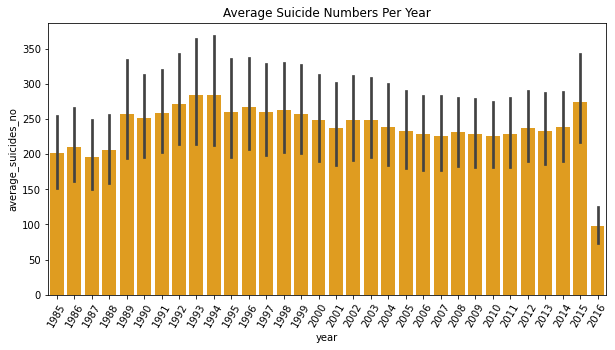

In [18]:
plt.figure(figsize = (10, 5))
sns.barplot(x=df.year, y=df.suicides_no, data = df, color = "orange")
plt.xlabel("year")
plt.ylabel("average_suicides_no")
plt.title("Average Suicide Numbers Per Year")
plt.xticks(rotation = 60)
plt.show()

In [19]:
df_year_mean = df.groupby(['year'])["suicides_no"].mean()
df_year_mean = df_year_mean.to_frame(name='avg_suicides_no')
df_year_mean_reset = df_year_mean.copy().reset_index()
df_year_mean_reset

,year,avg_suicides_no
0,1985,201.498264
1,1986,209.496528
2,1987,195.743827
3,1988,205.826531
4,1989,256.801282
5,1990,251.772135
6,1991,257.838542
7,1992,271.119231
8,1993,284.057692
9,1994,284.390931


##### Summary of the figure:  
The average suicide numbers have increased from around 200 in 1985 to above 280 in 1993-1994 with a slow decrease afterwards reaching to below 230 in mid-200s, which then stay somehow stable until 2014 followed by an increase to about 270 in 2015 and sharp decline to below 100 in 2016.  
The sharp decline in 2016 needs further analysis. Let's look at the number of countries reporting and the number of cases for each year.
Let's first look at the total suicide numbers per year and country.

In [20]:
df_country_sum = df.groupby(['year'])["suicides_no"].sum()
df_country_sum = df_country_sum.to_frame(name='total_suicides_no')
df_country_sum_reset = df_country_sum.copy().reset_index()
df_country_sum_reset

,year,total_suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244
5,1990,193361
6,1991,198020
7,1992,211473
8,1993,221565
9,1994,232063


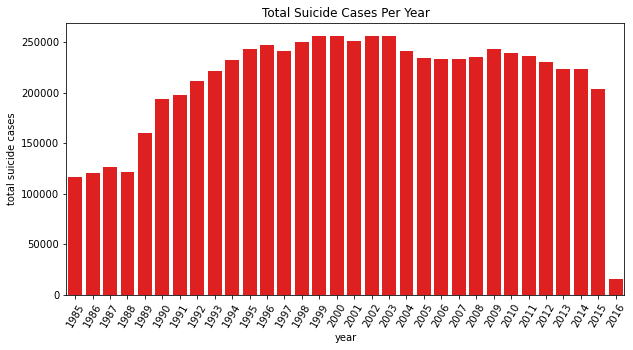

In [21]:
plt.figure(figsize = (10, 5))
sns.barplot(x=df_country_sum_reset.year, y=df_country_sum_reset.total_suicides_no, color = "red")
plt.xlabel("year")
plt.ylabel("total suicide cases")
plt.title("Total Suicide Cases Per Year")
plt.xticks(rotation = 60)
plt.show()

Let's see how many countries have reported data each year. 

In [22]:
df_country_count = df.groupby(['year'])["country"].count()
df_country_count = df_country_count.to_frame(name='reports_per_country')
df_country_count_reset = df_country_count.copy().reset_index()
df_country_count_reset

,year,reports_per_country
0,1985,576
1,1986,576
2,1987,648
3,1988,588
4,1989,624
5,1990,768
6,1991,768
7,1992,780
8,1993,780
9,1994,816


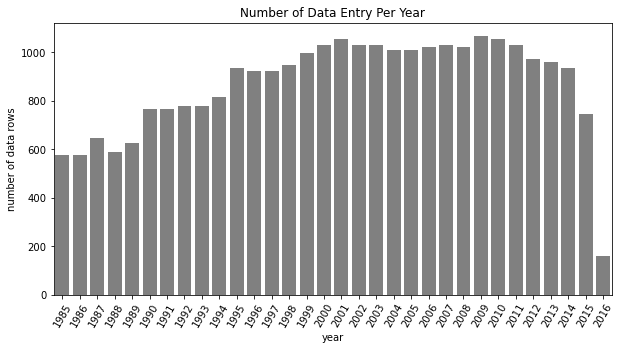

In [23]:
plt.figure(figsize = (10, 5))
sns.barplot(x=df_country_count_reset.year, y=df_country_count_reset.reports_per_country, color = "gray")
plt.xlabel("year")
plt.ylabel("number of data rows")
plt.title("Number of Data Entry Per Year")
plt.xticks(rotation = 60)
plt.show()

Summary:  
1. The number of suicide cases reported for 2016 is 15,603, which is the lowest of any years. The next lowest number is 116,063 in 1985. The highest number is 256,095, which is in 2002.  
2. The number of reports for 2016 is 160 while that for 1985 is 576. The highest number of reports is 1056 in 2001. These numbers indicate that the reporting for 2016 is incomplete. Therefore, we will look into suicide rate per 100,000 people in respective populations rather than the number of suicides alone. 

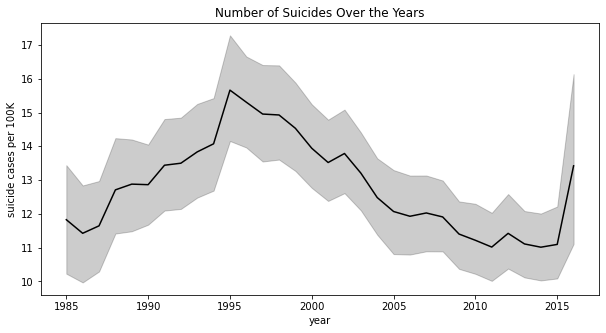

In [24]:
plt.figure(figsize = (10, 5))
sns.lineplot(x=df.year, y=df.suicides_per_100k, color = 'black')
plt.xlabel("year")
plt.ylabel("suicide cases per 100K")
plt.title("Number of Suicides Over the Years")
plt.show()

##### Summary:  
The suicide rates (cases per 100,000 in population) has steadily increased from around 11-12 in 1985 to more than 15 in 1994-1995. It then sharply decreased to below 11, below the level of 1985, by 2010, and has stayed about the same between 2010-2015 with a sharp spike to above 13 in 2016. This sharp increas may be due to the incomplete data in 2016. Obtaining complete data set for 2016 and after will provide better insights.

### General Suicide Rates per Sexes
Let's look at the total number of suicides for males and females.

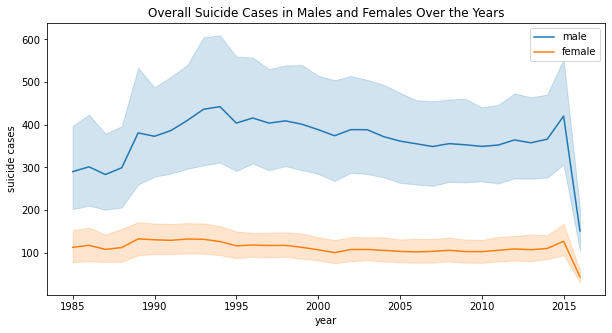

In [25]:
plt.figure(figsize = (10, 5))
sns.lineplot(x=df.year, y=df.suicides_no, hue = df.sex)
plt.xlabel("year")
plt.ylabel("suicide cases")
plt.legend()
plt.title("Overall Suicide Cases in Males and Females Over the Years")
plt.show()

However as indicated above, the incomplete numbers for 2016 make it necessary to look at the rate rather than total numbers.

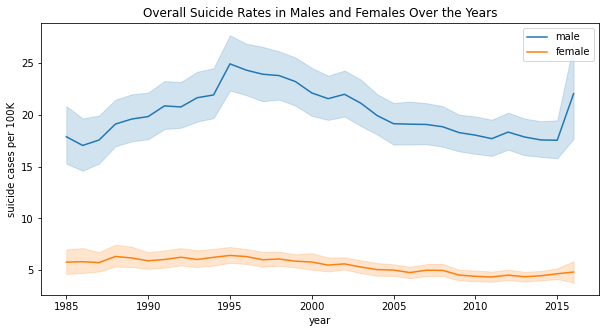

In [26]:
plt.figure(figsize = (10, 5))
sns.lineplot(x=df.year, y=df.suicides_per_100k, hue = df.sex)
plt.xlabel("year")
plt.ylabel("suicide cases per 100K")
plt.legend()
plt.title("Overall Suicide Rates in Males and Females Over the Years")
plt.show()

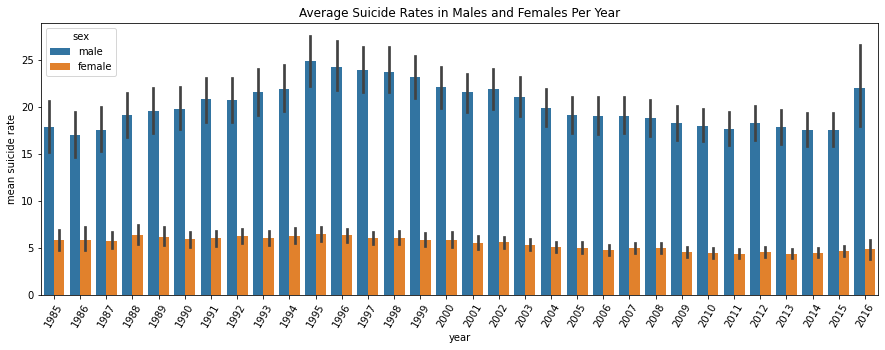

In [27]:
plt.figure(figsize = (15, 5))
sns.barplot(x=df.year, y=df.suicides_per_100k, hue = df.sex)
plt.xlabel("year")
plt.ylabel("mean suicide rate")
plt.title("Average Suicide Rates in Males and Females Per Year")
plt.xticks(rotation = 60)
plt.show()

##### Summary:   
When grouped according to sexes, the fluctuation in the suicide rates seen in raw numbers is mainly due to the rate in males, which is about 3-4 fold higher than that in females.  
The suicide rate in female group has stayed steady around 5-6 per 100K between 1985 and 1995 with a slight decrease afterwards.  
In males, the suicide rate has steadily increased from around 17-18 in 1985 to about 24-25 in 1995-1996 with a slow decrease to around 18 in 2015 and a sharp spike in 2016. It should be kept in mind that the data for 2016 is not complete and the sharp increase in 2016 may not necessarily be accurate.

### Suicide rates per age groups and generations in males and females

There are 6 age groups and 6 generations. Let's graph suicide rates for each age group and generation for females and males separately.  

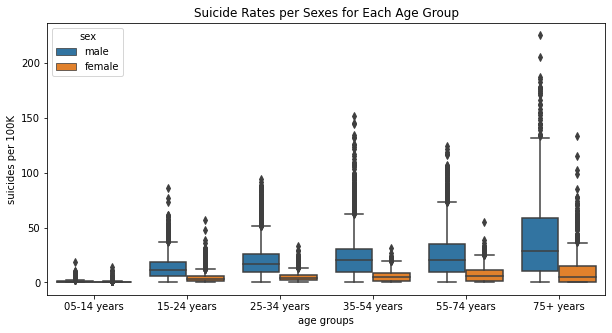

In [28]:
df.sort_values("age", ascending = True, inplace = True)
plt.figure(figsize = (10, 5))
sns.boxplot(x='age', y=df.suicides_per_100k, hue="sex", data=df)
plt.xlabel("age groups")
plt.ylabel("suicides per 100K")
plt.title("Suicide Rates per Sexes for Each Age Group")
plt.show()

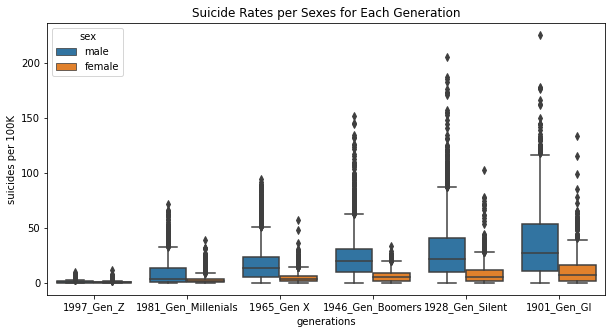

In [29]:
df.sort_values("generation", ascending = False, inplace = True)
plt.figure(figsize = (10, 5))
sns.boxplot(x='generation', y=df.suicides_per_100k, hue="sex", data=df)
plt.xlabel("generations")
plt.ylabel("suicides per 100K")
plt.title("Suicide Rates per Sexes for Each Generation")
plt.show()

##### Summary 
The suicide rates in both males and females show relative increase with the age and as the generations get older. As expected, in each generation and age groups, the suicide rates in females is several fold lower that those in males.

### Suicide rates by age groups and generations over the years
Let's look at the suicide rates over the years by age groups and then by generations  

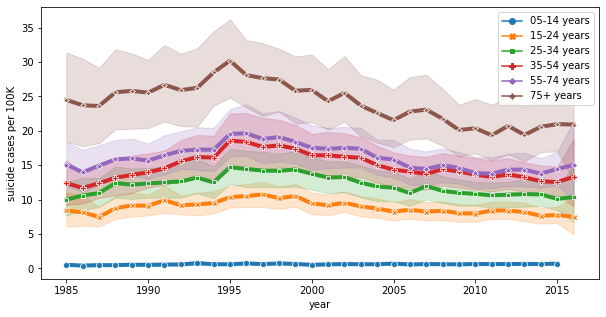

In [30]:
df.sort_values("age", inplace = True, ascending = True)
plt.figure(figsize = (10, 5))
sns.lineplot(x=df.year, y=df.suicides_per_100k, 
             hue = df.age, data = df,
             linewidth = 4, style = df.age, markers = True, dashes = False)
plt.xlabel("year")
plt.ylabel("suicide cases per 100K")
plt.xticks(rotation = 0)
plt.legend()
plt.show()

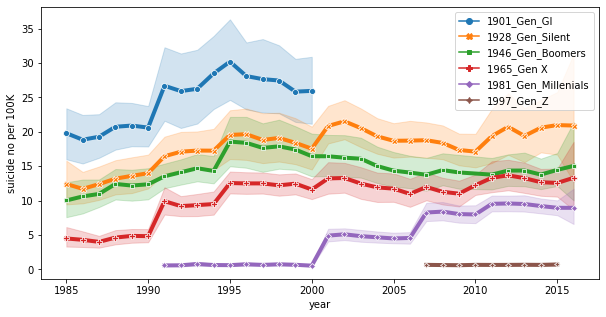

In [31]:
df.sort_values("generation", inplace = True, ascending = True)
plt.figure(figsize = (10, 5))
sns.lineplot(x=df.year, y=df.suicides_per_100k, 
             hue = df.generation, data = df,
             linewidth = 4, style = df.generation, markers = True, dashes = False)
plt.xlabel("year")
plt.ylabel("suicide no per 100K")
plt.xticks(rotation = 0)
plt.legend()
plt.show()

##### Summary: 
These last two vizs confirm that the suicides rates increases with age and as generations get older.

### Aggregate analysis
Let's aggreagate suicide numbers and rates for each country according to years and age

In [32]:
df_country = df.country.unique()
len(df_country)

101

There are data points for 32 years (1985-2016) for the following 101 countries. 

In [33]:
print("unique values in country column :\n", df_country)

unique values in country column :
 ['Portugal' 'Spain' 'Greece' 'Germany' 'Sri Lanka' 'Guatemala' 'Grenada'
 'Dominica' 'Iceland' 'Georgia' 'Suriname' 'Romania' 'New Zealand'
 'Slovenia' 'Israel' 'South Africa' 'Guyana' 'Finland' 'France' 'Estonia'
 'Sweden' 'Slovakia' 'Singapore' 'Japan' 'El Salvador' 'Jamaica' 'Norway'
 'Switzerland' 'Hungary' 'Russian Federation' 'Montenegro' 'Netherlands'
 'Ireland' 'Poland' 'Puerto Rico' 'Antigua and Barbuda' 'Uzbekistan'
 'Saint Lucia' 'Mauritius' 'Saint Kitts and Nevis' 'Mexico' 'Colombia'
 'Czech Republic' 'United States' 'Thailand' 'Latvia' 'Cuba' 'Qatar'
 'Albania' 'Panama' 'Malta' 'Trinidad and Tobago'
 'Saint Vincent and Grenadines' 'Luxembourg' 'Armenia' 'Ecuador' 'Italy'
 'Belize' 'Denmark' 'Costa Rica' 'Uruguay' 'Aruba' 'Chile' 'Bulgaria'
 'Brazil' 'Austria' 'Turkmenistan' 'Australia' 'Ukraine' 'Argentina'
 'Canada' 'Paraguay' 'Bahamas' 'Croatia' 'Maldives' 'United Kingdom'
 'Bahrain' 'Azerbaijan' 'Belarus' 'Macau' 'Republic of Korea'
 '

### Suicide rate per year for each country 
Let's sort and graph the total suicide rates per 100K for each country 

In [34]:
df2 = df.copy()
df_country_p100k_agg = df2.groupby('country')['suicides_per_100k'].mean()
df_country_p100k_agg = df_country_p100k_agg.to_frame(name='avg_suicide_per_100k') # convert it to dataframe
df_country_p100k_agg = df_country_p100k_agg.reset_index() # make the index as first column 
df_country_p100k_agg_sort = df_country_p100k_agg.sort_values(by='avg_suicide_per_100k', ascending=False) # order or sort
df_country_p100k_agg_sort

,country,avg_suicide_per_100k
52,Lithuania,40.415573
87,Sri Lanka,35.295152
75,Russian Federation,34.892377
40,Hungary,32.761516
11,Belarus,31.075913
...,...,...
65,Oman,0.736111
1,Antigua and Barbuda,0.552901
45,Jamaica,0.521765
76,Saint Kitts and Nevis,0.000000


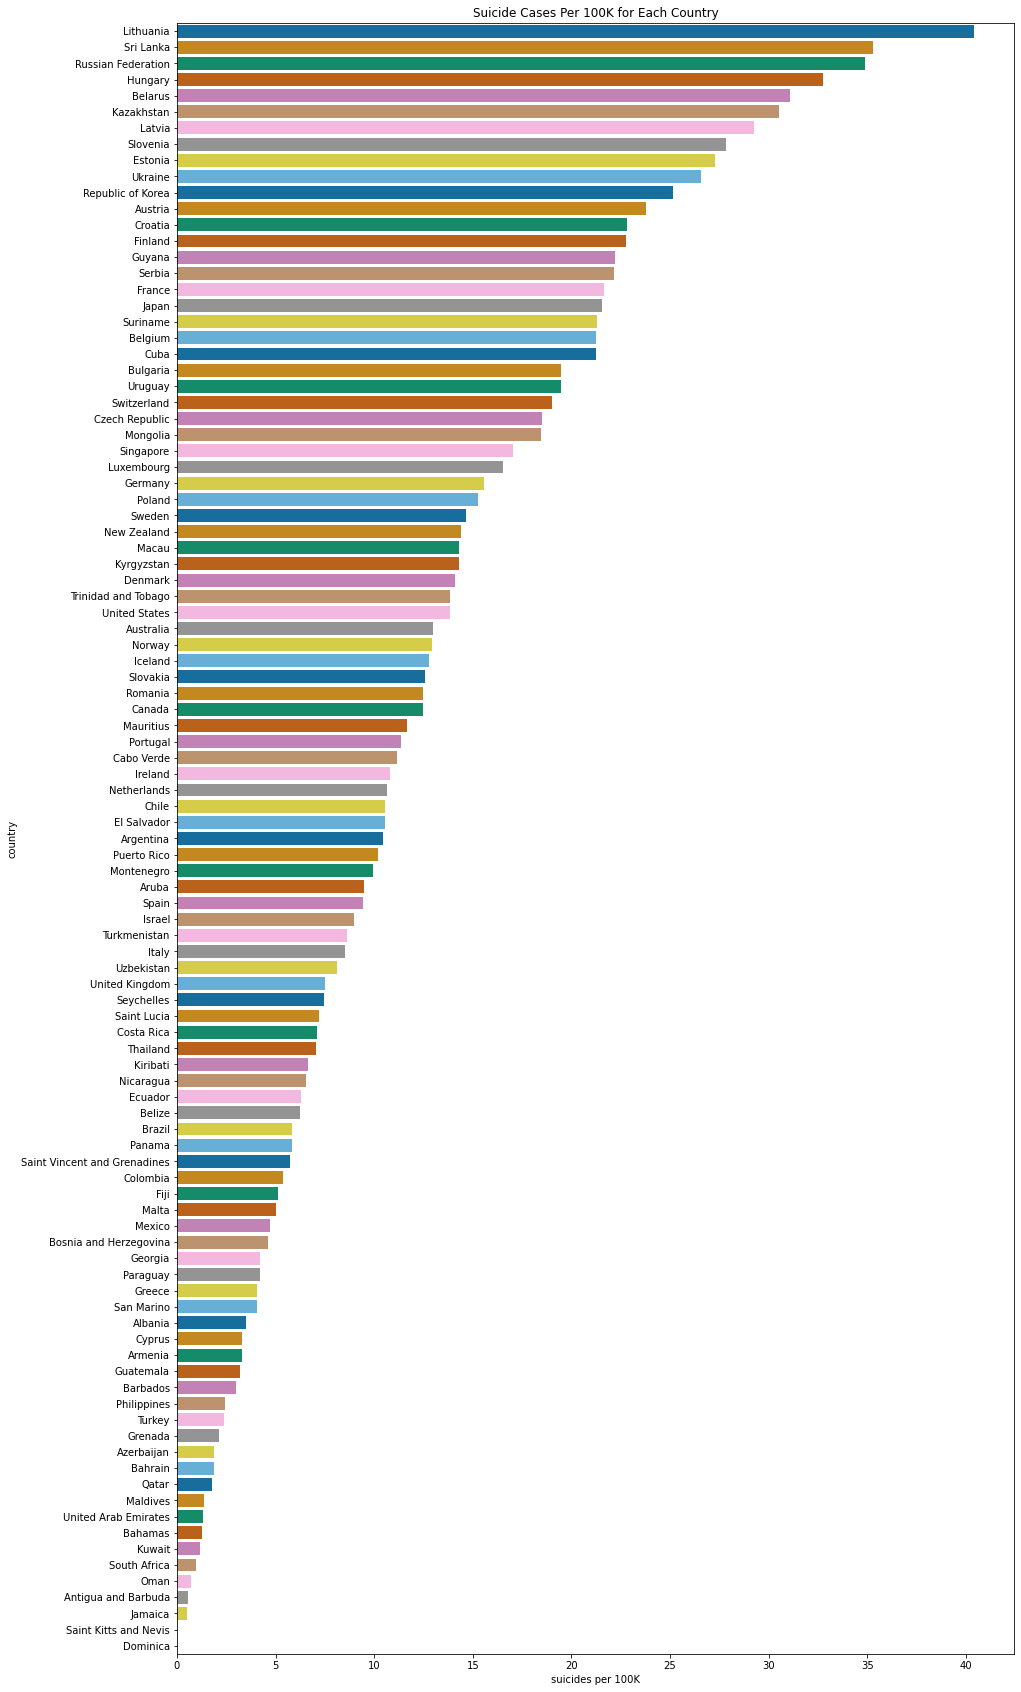

In [35]:
plt.figure(figsize = (15, 30))
sns.barplot(x=df_country_p100k_agg_sort.avg_suicide_per_100k, 
            y=df_country_p100k_agg_sort.country,
            palette="colorblind")
plt.xlabel("suicides per 100K")
plt.ylabel("country")
plt.title("Suicide Cases Per 100K for Each Country")
plt.show()

#### Analysis of the relationship between the GDP and suicide rates
Let's first graph GDP rate for each country and then relate GDP and suicide rates for each country.

In [36]:
df3 = df.copy()
df_country_GDP_agg = df3.groupby('country')['GDP_per_capita_USD'].mean()
df_country_GDP_agg = df_country_GDP_agg.to_frame(name='avg_GDP_per_capita_USD') # convert it to dataframe
df_country_GDP_agg = df_country_GDP_agg.reset_index() # make the index as first column 
df_country_GDP_agg_sort = df_country_GDP_agg.sort_values(by='avg_GDP_per_capita_USD', ascending=False) # order or sort
df_country_GDP_agg_sort

,country,avg_GDP_per_capita_USD
53,Luxembourg,68798.387097
72,Qatar,67756.449438
90,Switzerland,62981.761905
64,Norway,57319.600000
79,San Marino,53663.666667
...,...,...
7,Azerbaijan,1005.125000
100,Uzbekistan,976.181818
87,Sri Lanka,904.272727
48,Kiribati,875.909091


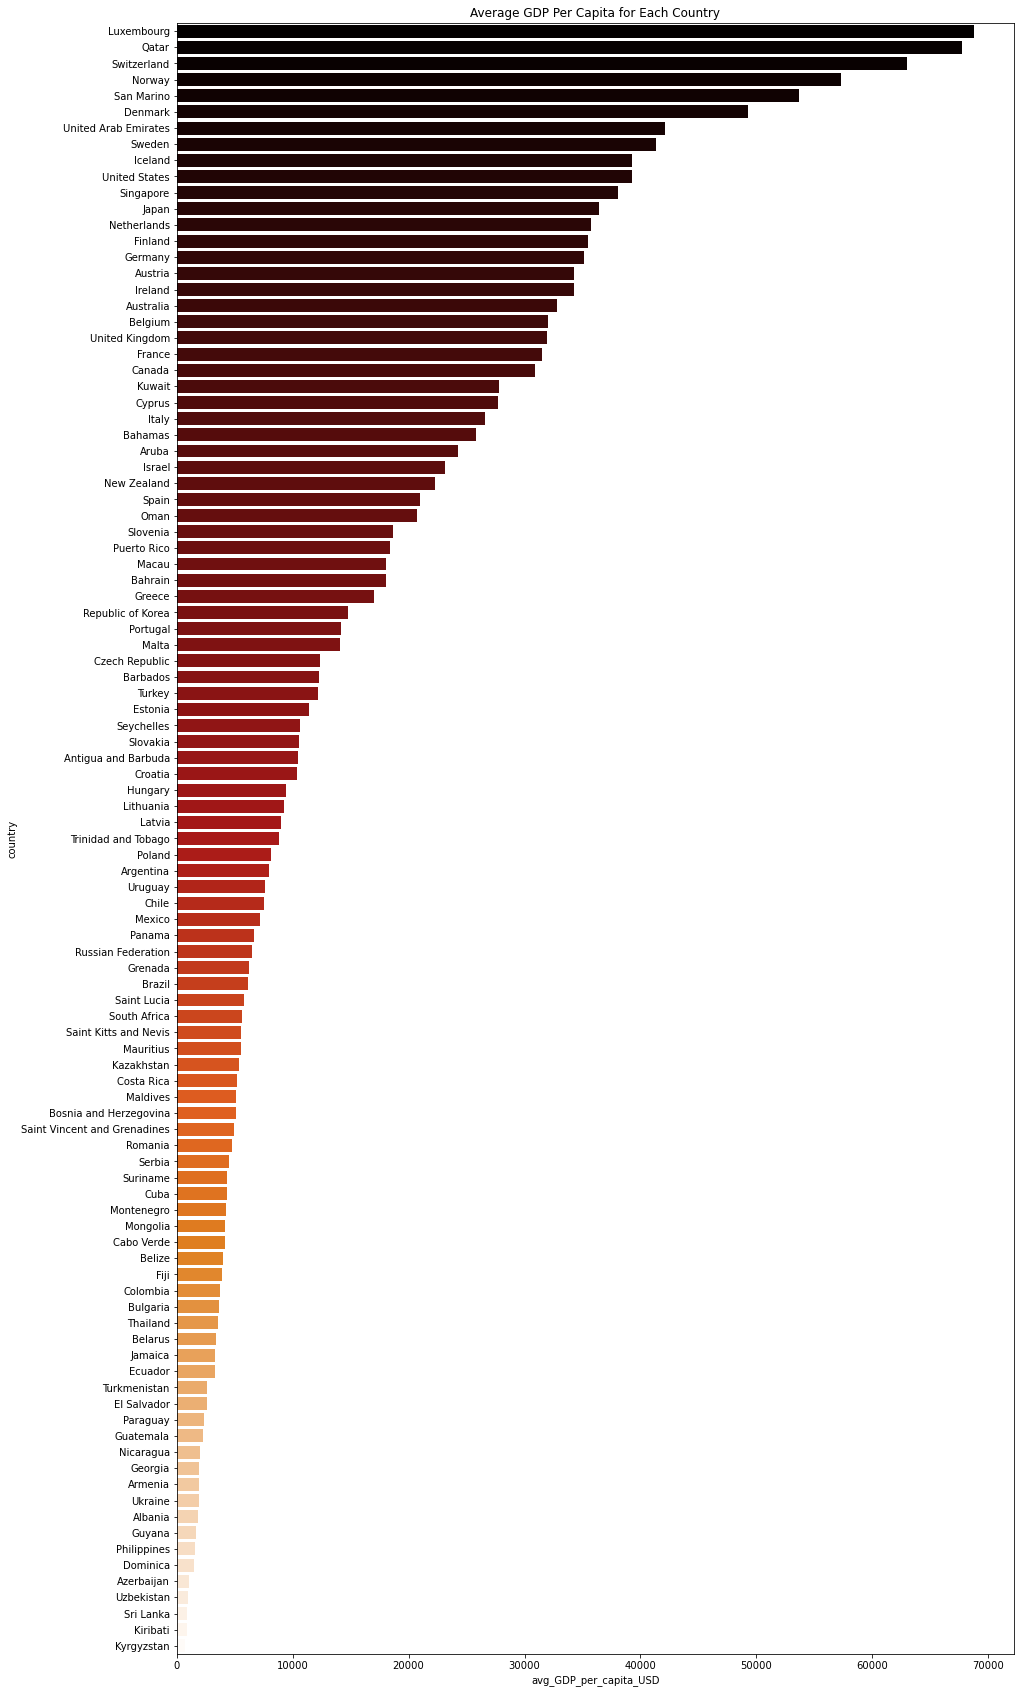

In [37]:
plt.figure(figsize = (15, 30))
sns.barplot(x=df_country_GDP_agg_sort.avg_GDP_per_capita_USD, 
            y=df_country_GDP_agg_sort.country,
            palette="gist_heat")
plt.xlabel("avg_GDP_per_capita_USD")
plt.ylabel("country")
plt.title("Average GDP Per Capita for Each Country")
plt.show()

## Correlation between Suicide Rate and GDP

### Change of suicide rates over the years for each country
Let's list countries with aggregated suicide rates over the years and then graph them. 

In [38]:
df_country_year_s_rate = df.groupby(["country", "year"]).suicides_per_100k.mean()
df_country_year_s_rate = df_country_year_s_rate.sort_index(ascending = True)[:]
df_country_year_s_rate

country     year
Albania     1987    2.654167
            1988    2.705000
            1989    2.783333
            1992    1.500000
            1993    2.713333
                      ...   
Uzbekistan  2010    5.269167
            2011    5.595000
            2012    6.460833
            2013    6.571667
            2014    7.093333
Name: suicides_per_100k, Length: 2321, dtype: float64

In [39]:
country_dict = {}
for country in df_country_year_s_rate.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_country_year_s_rate[country].mean()
    else:
        pass
    
tup = list(country_dict.items())
tup.sort(key = lambda pair:pair[1], reverse = True)

df_country_list = [a[0] for a in tup]
df_country_year_suicide = [a[1] for a in tup]

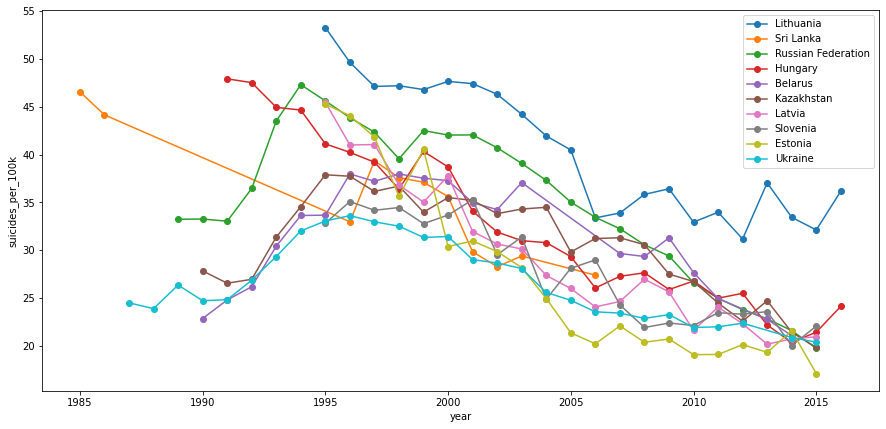

In [40]:
plt.figure(figsize = (15,7))
df_suicide_rate = df_country_year_s_rate.groupby(["country", "year"]).mean()
for country in df_country_list[:10]:
    plt.plot(df_suicide_rate[country].index,
             df_suicide_rate[country].values,
             label = country, marker = "o")
plt.xlabel("year")
plt.ylabel("suicides_per_100k")
plt.legend()
plt.show()

All the top 10 countries show a steady decrease in the rate of suicide over the years since mid-1990s. All of them except Sri Lanka belong to previous Soviet block (Eastern European and Kazakhstan). 

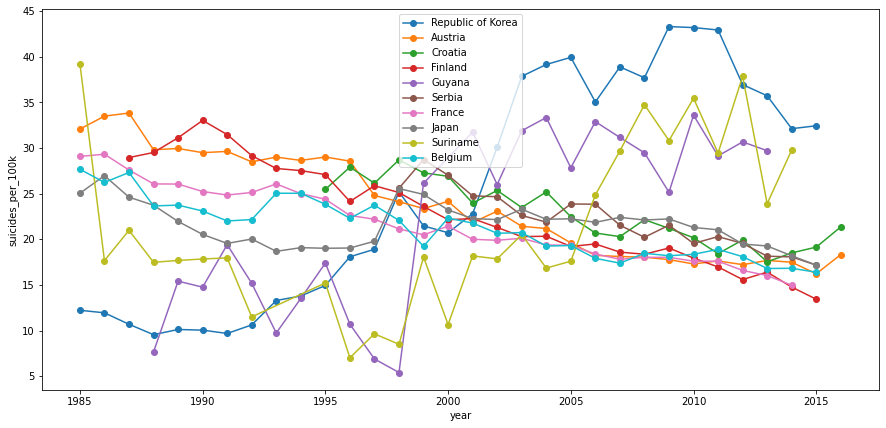

In [41]:
plt.figure(figsize = (15,7))
df_suicide_rate = df_country_year_s_rate.groupby(["country", "year"]).mean()
for country in df_country_list[10:20]:
    plt.plot(df_suicide_rate[country].index,
             df_suicide_rate[country].values,
             label = country, marker = "o")
plt.xlabel("year")
plt.ylabel("suicides_per_100k")
plt.legend()
plt.show()

The top 10-20 countries, (except Guyana, Republic of Korea, and Suriname), show a similar steady decrease in the rate of suicide over the years since 1985. Suriname starts high in 1985 with a deep in late 1990s and a surging increase while Guyana and Republic of Korean show a steady increase that levels off atfer mid-2010s. 

#### Analysis of GDP for each country
Let's list countries with their GDP per capita over the years and then graph them. 

In [42]:
df_country_year_GDP = df.groupby(["country", "year"]).GDP_per_capita_USD.mean()
df_country_year_GDP = df_country_year_GDP.sort_index(ascending = True)[:]
df_country_year_GDP

country     year
Albania     1987     796.0
            1988     769.0
            1989     833.0
            1992     251.0
            1993     437.0
                     ...  
Uzbekistan  2010    1533.0
            2011    1767.0
            2012    1964.0
            2013    2150.0
            2014    2309.0
Name: GDP_per_capita_USD, Length: 2321, dtype: float64

In [43]:
country_dict_GDP = {}
for country in df_country_year_GDP.index.get_level_values(0):
    if country not in country_dict_GDP.keys():
        country_dict_GDP[country] = df_country_year_GDP[country].mean()
    else:
        pass
    
tup_GDP = list(country_dict_GDP.items())
tup_GDP.sort(key = lambda pair:pair[1], reverse = True)

df_country_list_GDP = [a[0] for a in tup_GDP]
df_country_GDP = [a[1] for a in tup_GDP]

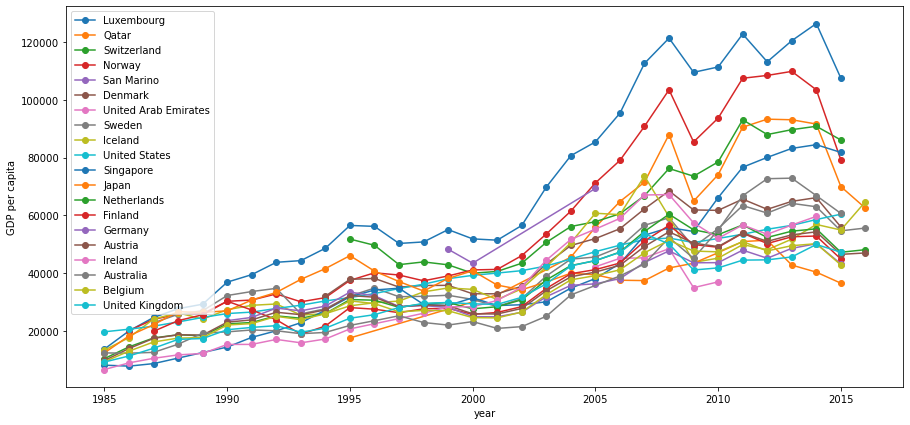

In [44]:
plt.figure(figsize = (15,7))
df_GDP = df_country_year_GDP.groupby(["country", "year"]).mean()
for country in df_country_list_GDP[:20]:
    plt.plot(df_GDP[country].index,
             df_GDP[country].values,
             label = country, marker = "o")
plt.xlabel("year")
plt.ylabel("GDP per capita")
plt.legend()
plt.show()

Many countries have shown a sharp increase in their GDP per capita starting from early 2000s.

#### Analysis of HDI for each country
Let's list countries with their HDI over the years and then graph them. 

In [45]:
df_country_year_HDI = df.groupby(["country", "year"]).HDI_for_year.mean()
df_country_year_HDI = df_country_year_HDI.sort_index(ascending = True)[:]
df_country_year_HDI

country     year
Albania     1987      NaN
            1988      NaN
            1989      NaN
            1992      NaN
            1993      NaN
                    ...  
Uzbekistan  2010    0.655
            2011    0.661
            2012    0.668
            2013    0.672
            2014    0.675
Name: HDI_for_year, Length: 2321, dtype: float64

In [46]:
country_dict_HDI = {}
for country in df_country_year_HDI.index.get_level_values(0):
    if country not in country_dict_HDI.keys():
        country_dict_HDI[country] = df_country_year_HDI[country].mean()
    else:
        pass
    
tup_HDI = list(country_dict_HDI.items())
tup_HDI.sort(key = lambda pair:pair[1], reverse = True)

df_country_list_HDI = [a[0] for a in tup_HDI]
df_country_HDI = [a[1] for a in tup_HDI]

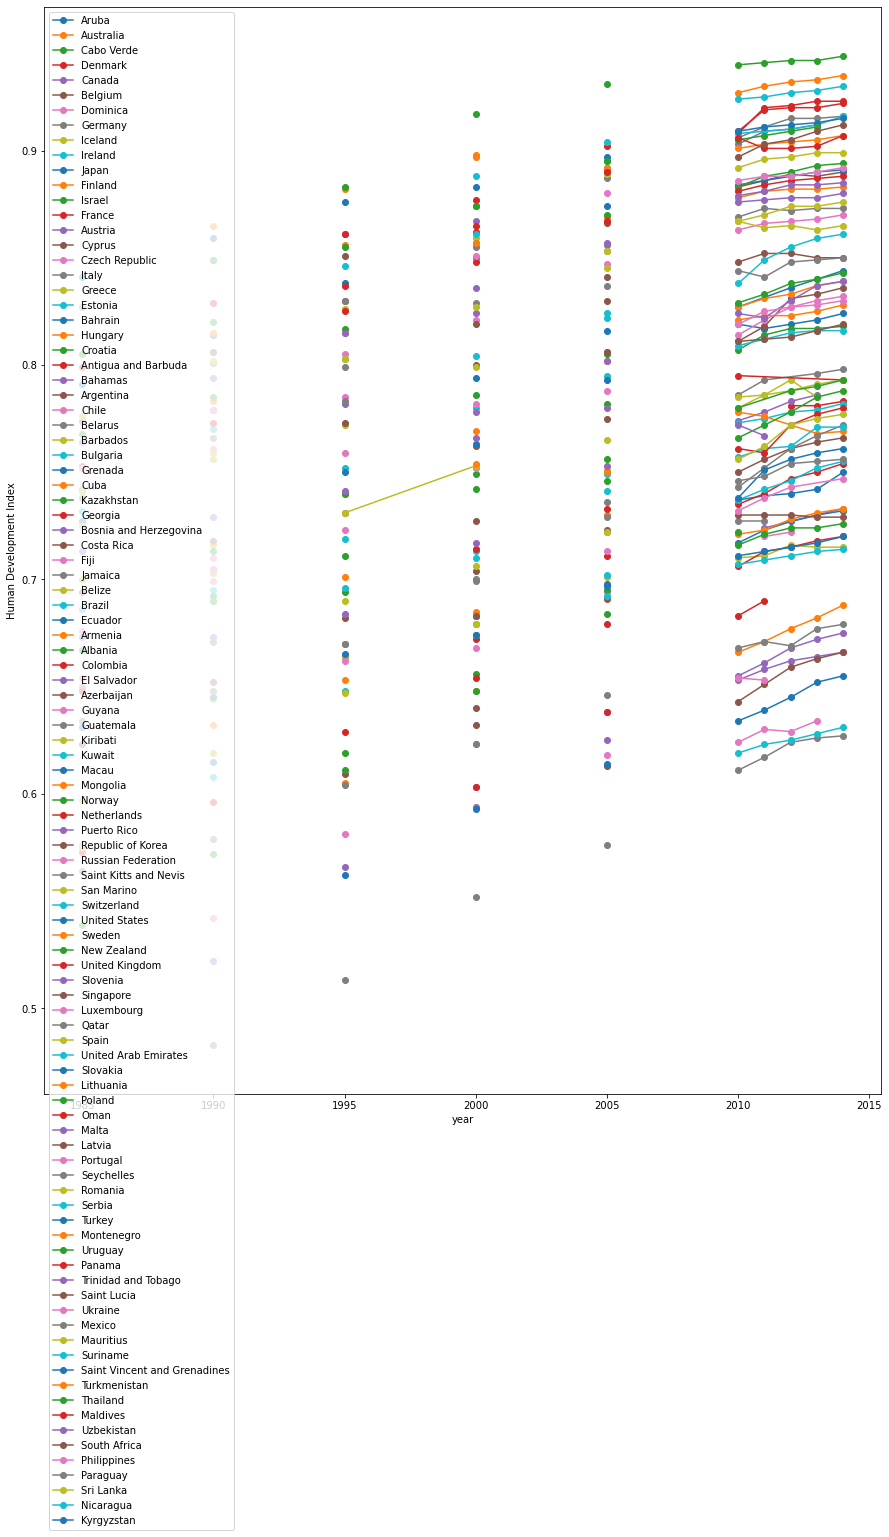

In [47]:
plt.figure(figsize = (15,20))
df_HDI = df_country_year_HDI.groupby(["country", "year"]).mean()
for country in df_country_list_HDI[:]:
    plt.plot(df_HDI[country].index,
             df_HDI[country].values,
             label = country, marker = "o")
plt.xlabel("year")
plt.ylabel("Human Development Index")
plt.legend()
plt.show()

Summary:  
HDI values are available every 5 years between 1985-2010 and every year between 2010-2015.  
HDI show an overall steady increase over the years.  
Countries seem to have been grouped in 5 distinct bins of HDI, which we can arbitrarily name as following with the HDI values in 2010s:  
- low HDI: below 0.70 HDI  
- medium HDI: between 0.70 - 0.80 HDI  
- low high HDI: between 0.80 - 0.85 HDI  
- high HDI: between 0.86 - 0.95 HDI

### Analysis of correlation between GDP and suicide rate
Let's analyze the correlation between suicide rate and GDP per capita through regression plots and correlation coefficient value. 

In [48]:
df4 = df.copy()
df_year_country_GDP_agg = df4.groupby(['country', 'year'])['GDP_per_capita_USD'].mean()
df_year_country_GDP_agg = df_year_country_GDP_agg.to_frame(name='avg_GDP_per_capita_USD') # convert it to dataframe
df_year_country_GDP_agg = df_year_country_GDP_agg.reset_index() # make the index as first column 
df_year_country_GDP_agg_sort = df_year_country_GDP_agg.sort_values(by='avg_GDP_per_capita_USD', ascending=False) # order or sort
df_year_country_GDP_agg_sort

,country,year,avg_GDP_per_capita_USD
1306,Luxembourg,2014,126352.0
1303,Luxembourg,2011,122729.0
1300,Luxembourg,2008,121315.0
1305,Luxembourg,2013,120423.0
1304,Luxembourg,2012,113120.0
...,...,...,...
83,Armenia,1993,357.0
1219,Kyrgyzstan,2001,345.0
1218,Kyrgyzstan,2000,313.0
1217,Kyrgyzstan,1999,291.0


In [49]:
df_suicide_data = df[["country", "suicides_per_100k", "HDI_for_year", "GDP_for_year_USD", "GDP_per_capita_USD"]]
df_suicide_data

,country,suicides_per_100k,HDI_for_year,GDP_for_year_USD,GDP_per_capita_USD
19478,Portugal,12.31,0.759,118133634072,12469
23696,Spain,43.95,NaN,633194118900,16756
10051,Greece,4.29,NaN,65652751132,6994
9773,Germany,23.94,0.830,2591620035485,33420
23900,Sri Lanka,125.22,0.597,5978460972,431
...,...,...,...,...,...
23515,South Africa,0.06,0.666,350904575292,7174
19330,Poland,0.84,0.840,524234322597,14552
27207,United States,0.74,0.915,17427609000000,58531
27519,Uruguay,0.41,0.788,51264390116,16264


In [50]:
corr_suicide = df_suicide_data.corr()
corr_suicide.style.background_gradient(cmap='coolwarm')

,suicides_per_100k,HDI_for_year,GDP_for_year_USD,GDP_per_capita_USD
suicides_per_100k,1.000000,0.074279,0.025240,0.001785
HDI_for_year,0.074279,1.000000,0.305193,0.771228
GDP_for_year_USD,0.025240,0.305193,1.000000,0.303405
GDP_per_capita_USD,0.001785,0.771228,0.303405,1.000000


By looking at the correlation at the overall levels of suicide rate and GDP per capita, there is a no correlation coefficient (0.0018) between GDP and suicide rate. However, let's look at this correlation between GDP and suicide rate in more details at each country level. 

In [51]:
df_country_year_suicide = df.groupby(["country", "year"])["suicides_no"].sum()
df_suicide_sum = df_country_year_suicide.sort_index(ascending = True)[:]

df_pop = df.groupby(["country", "year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending = True)[:] # change it to True

df_suicide_total = 100000*(df_suicide_sum / df_pop_sum)
df_suicide_total.head(10)

country  year
Albania  1987    2.694125
         1988    2.279058
         1989    2.425886
         1992    1.665190
         1993    2.600363
         1994    1.754817
         1995    3.030929
         1996    3.027005
         1997    5.709871
         1998    5.111694
dtype: float64

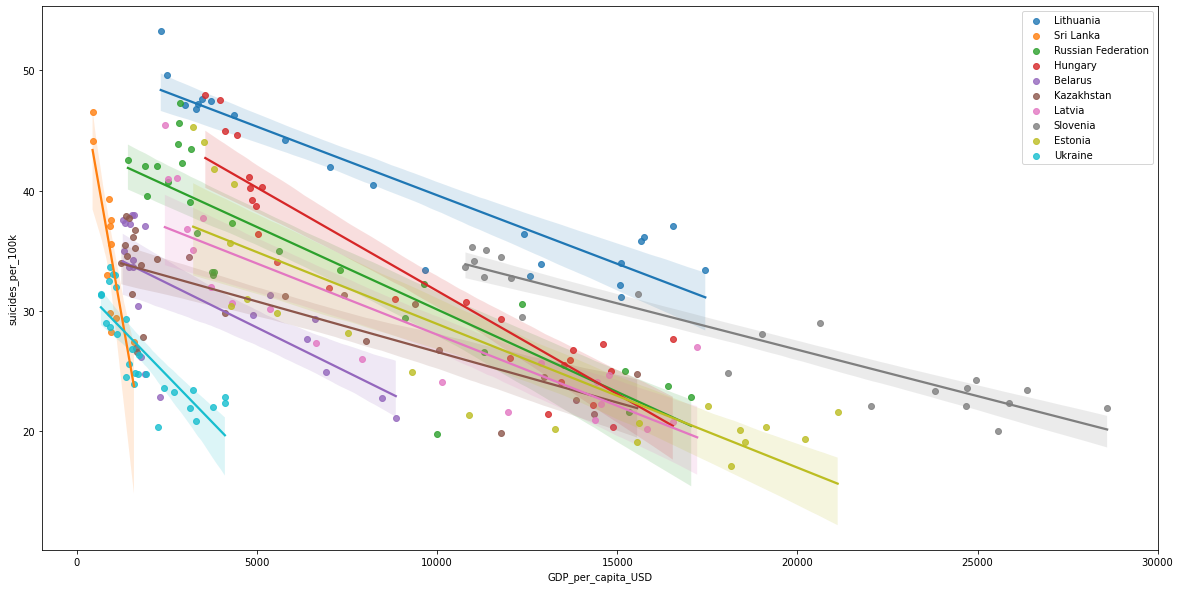

In [52]:
plt.figure(figsize = (20, 10))
df_gdp = df.groupby(["country", "year"]).GDP_per_capita_USD.mean()
df_suicide = df.groupby(["country", "year"]).suicides_per_100k.mean()
for country in df_country_list[:10]:
    sns.regplot(x=df_gdp[country].values,
                y=df_suicide[country].values,
                label = country)
plt.xlabel("GDP_per_capita_USD")
plt.ylabel("suicides_per_100k")
plt.xlim()
plt.ylim()
plt.legend()
plt.show()

All of the top 10 countries with the highest suicide rate, except Sri Lanka, are countries that were in the Sovyet block, Eastern European countries and Kazakhstan. In all of these 10 countries, the suicide rates show inverse correlation with GDP per capita. This correlation is very steep for Sri Lanka despite having a very low GDP.

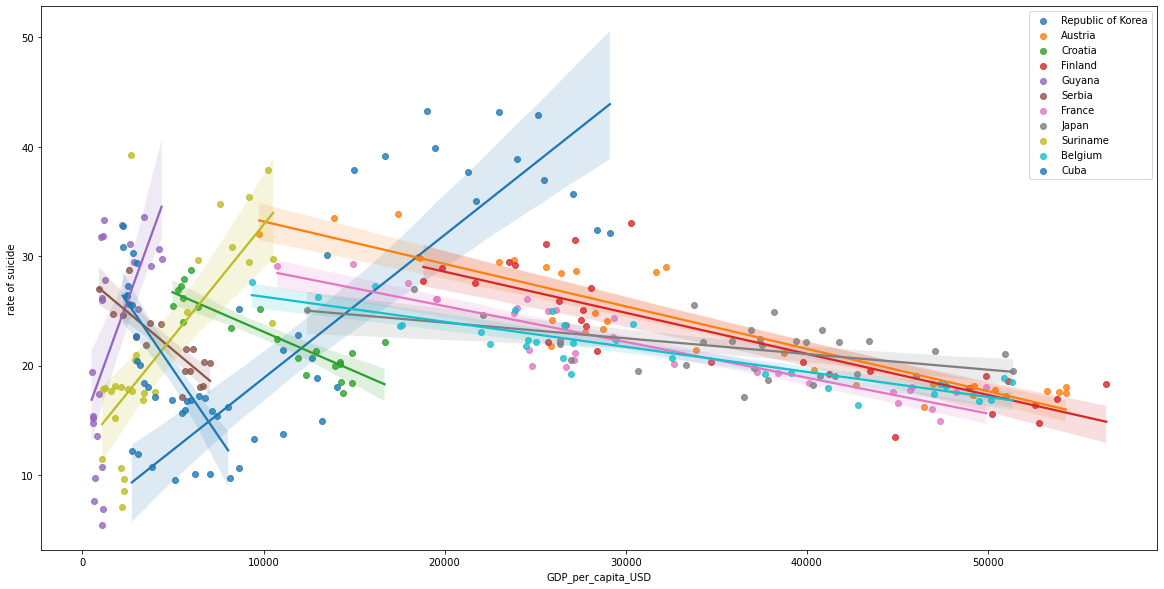

In [53]:
plt.figure(figsize = (20, 10))
df_gdp = df.groupby(["country", "year"]).GDP_per_capita_USD.mean()
df_suicide = df.groupby(["country", "year"]).suicides_per_100k.mean()
for country in df_country_list[10:21]:
    sns.regplot(x=df_gdp[country].values,
                y=df_suicide[country].values,
                label = country)
plt.xlabel("GDP_per_capita_USD")
plt.ylabel("rate of suicide")
plt.xlim()
plt.ylim()
plt.legend()
plt.show()

Note the graphs of Guyana, Republic of Korea, and Suriname, going up as GDP increases, against the majority of other countries.

#### Correlation coefficient (r) value: 
Now let's look at the correlation coefficient (r value). The r value for each of the countries are listed below. Note that the countries are listed from the highest suicide rate to the lowest and the negative r value indicates negative (inverse) correlation while positive r indicates positive correlation between suicide rate and GDP per capita for that country. r value fluctuates between +1 and -1 and the farther from 0, the higher the correlation (negative or positive) is. r=0 means no correlation.  The majority of the countries with the highest suicide rate show inverse correlation (negative r value) with the GDP per capita while majority of those with the lowest suicide rate show a positive correlation (positive r value) with the GDP per capita. 

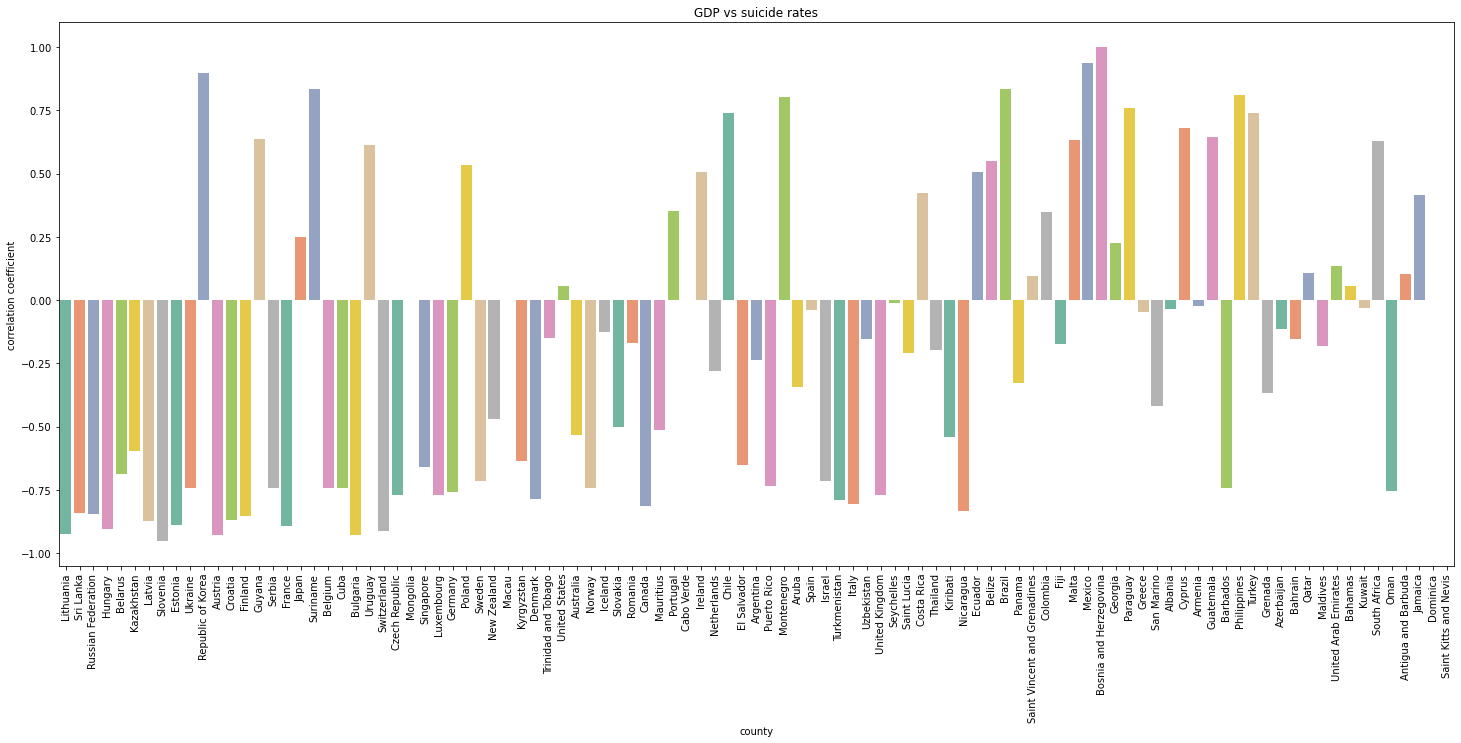

In [54]:
corr_eff = {}
for country in df_country_list[:]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values, 
                                                                   df_suicide_total[country].values)
    corr_eff[country] = float(r_value)

plt.figure(figsize = (25, 10))
sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "Set2")
plt.xticks(rotation = 90)
plt.xlabel("county")
plt.ylabel("correlation coefficient")
plt.title("GDP vs suicide rates")
plt.show()

#### p value
We shall also calculate p_value. p value can fluctuate between 0 and +1. The p value of 0.05 or smaller is generally considered more trustable result. 

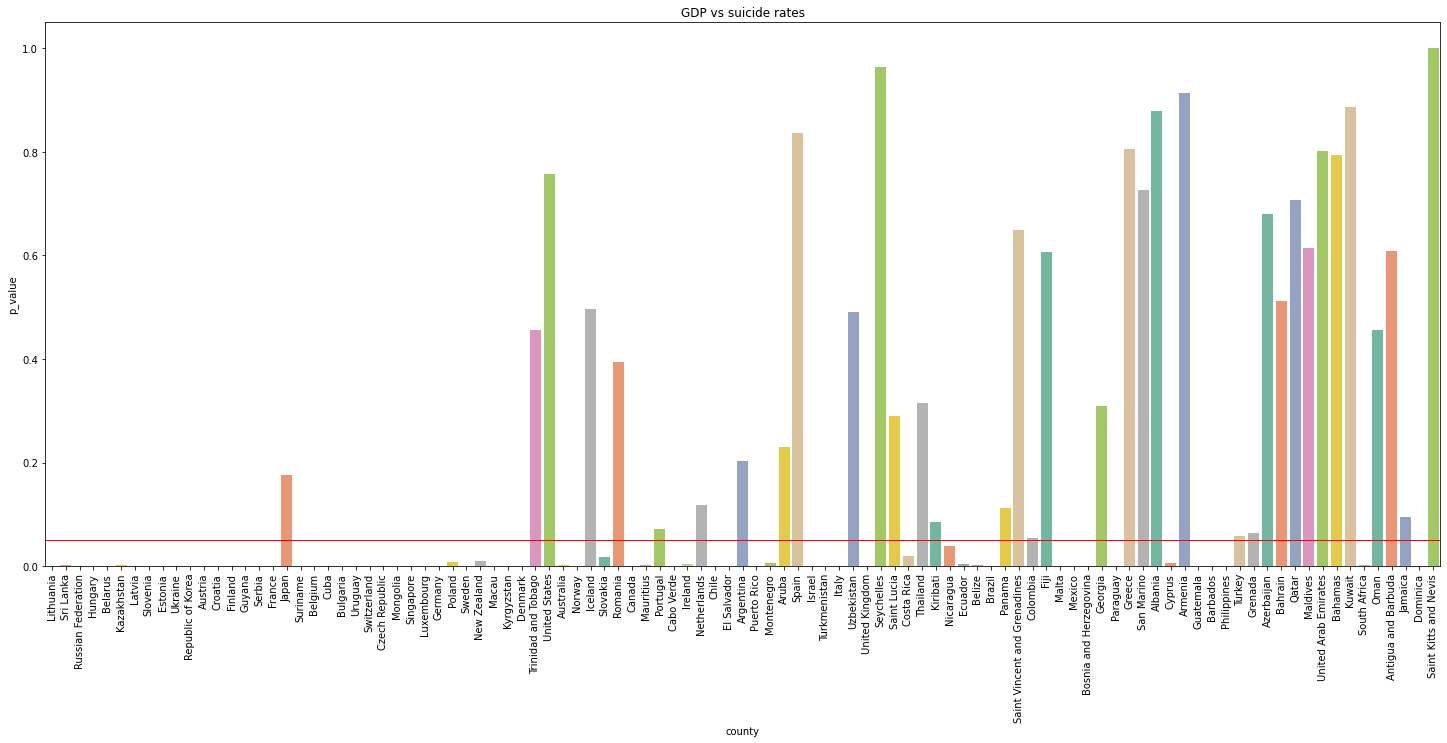

In [84]:
corr_eff = {}
for country in df_country_list[:]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values, 
                                                                   df_suicide_total[country].values)
    corr_eff[country] = float(p_value)

plt.figure(figsize = (25, 10))
sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "Set2")
plt.axhline(y=0.05, linewidth=1, color='r') # add a threshold line at the 0.05 p value.
plt.xticks(rotation = 90)
plt.xlabel("county")
plt.ylabel("p_value")
plt.title("GDP vs suicide rates")
plt.show()